# ABS Quarterly National Accounts 5206

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-set-up" data-toc-modified-id="Python-set-up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python set-up</a></span></li><li><span><a href="#Python-environment" data-toc-modified-id="Python-environment-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Python environment</a></span></li><li><span><a href="#Get-data-from-ABS" data-toc-modified-id="Get-data-from-ABS-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Get data from ABS</a></span></li><li><span><a href="#Plot" data-toc-modified-id="Plot-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plot</a></span><ul class="toc-item"><li><span><a href="#Growth-charts---based-on-seasonally-adjusted-series" data-toc-modified-id="Growth-charts---based-on-seasonally-adjusted-series-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Growth charts - based on seasonally adjusted series</a></span></li></ul></li><li><span><a href="#Finished" data-toc-modified-id="Finished-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Finished</a></span></li></ul></div>

## Python set-up

In [1]:
# system imports
import sys
import platform
import psutil
from pathlib import Path

# analytic imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.units as munits

# abs specific imports
from abs_common import *

# pandas display settings
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# plotting stuff
plt.style.use('ggplot')

In [2]:
# cache directory
CACHE_DIR = '../cache'
Path(CACHE_DIR).mkdir(parents=True, exist_ok=True)

# charts directory
CHART_DIR = '../charts'
Path(CHART_DIR).mkdir(parents=True, exist_ok=True)

## Python environment

In [3]:
N = 50
print('-'*N)
print(f"System:         {platform.system()}")
print(f"Release:        {platform.release()}")
#print(f"Version:        {platform.version()}")
print(f"Machine:        {platform.machine()}")
print(f"Processor:      {platform.processor()}")
print(f"RAM:            {round(psutil.virtual_memory().total / 1024**3)}GB")
print('-'*N)
print(f"Python:         {platform.python_version()}")
print(f"Psutil:         {psutil.__version__}")
print(f"Pandas:         {pd.__version__}")
print(f"Numpy:          {np.__version__}")
print(f"Matplotlib:     {mpl.__version__}")
print('-'*N)

--------------------------------------------------
System:         Darwin
Release:        20.1.0
Machine:        x86_64
Processor:      i386
RAM:            64GB
--------------------------------------------------
Python:         3.8.3
Psutil:         5.7.0
Pandas:         1.0.5
Numpy:          1.18.5
Matplotlib:     3.2.2
--------------------------------------------------


## Get data from ABS

In [4]:
url_template = ('https://www.abs.gov.au/statistics/economy/national-accounts/'
                'australian-national-accounts-national-income-expenditure-and-product/'
                'MONTH-YEAR/All_time_series_workbooks.zip')

meta, data = get_ABS_meta_and_data(url_template, CACHE_DIR)

File has been cached already
File for sep-2020 of size 5.4 MB


## Plot

### Growth charts - based on seasonally adjusted series

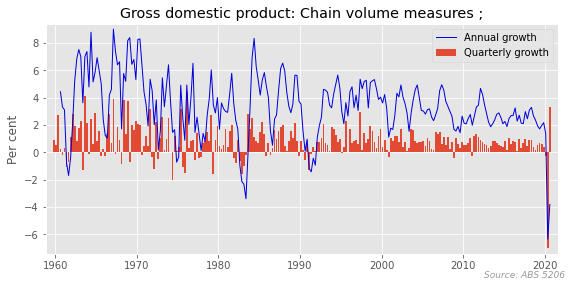

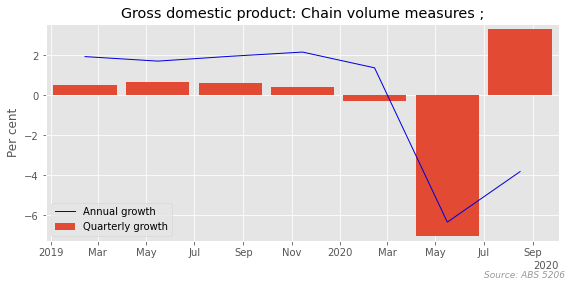

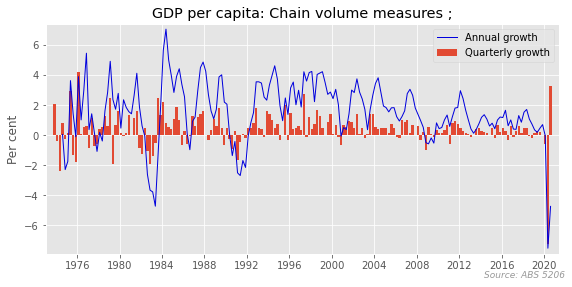

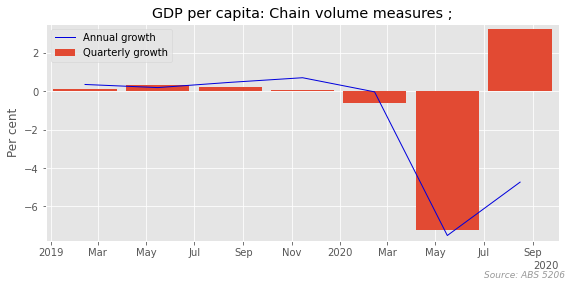

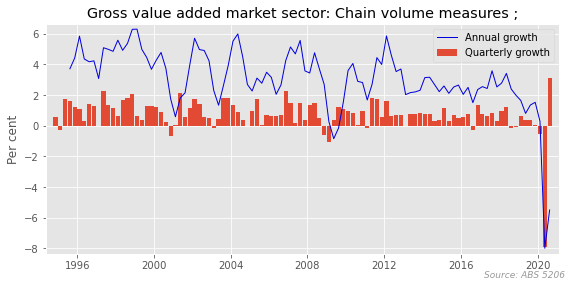

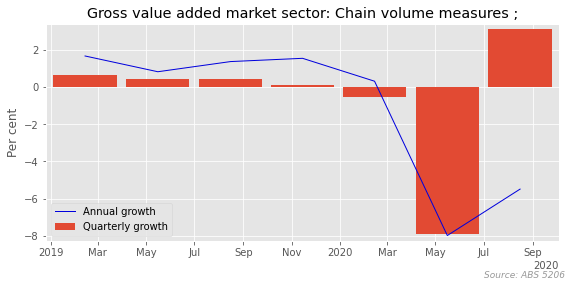

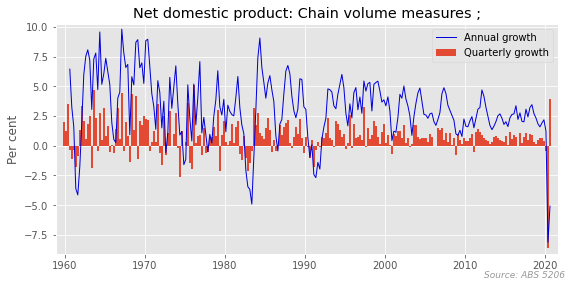

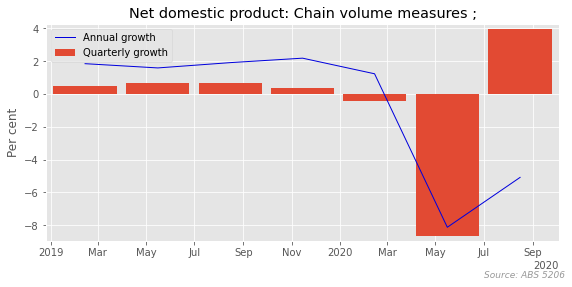

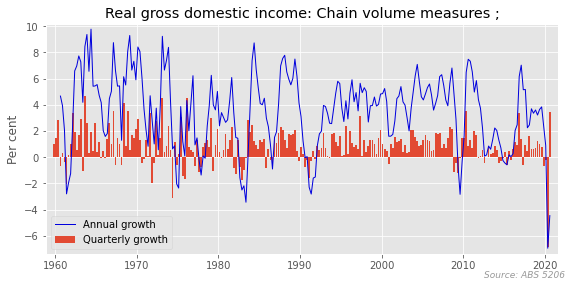

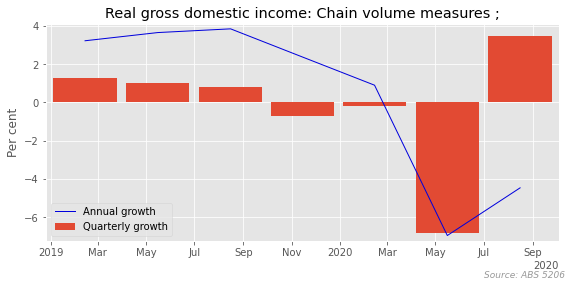

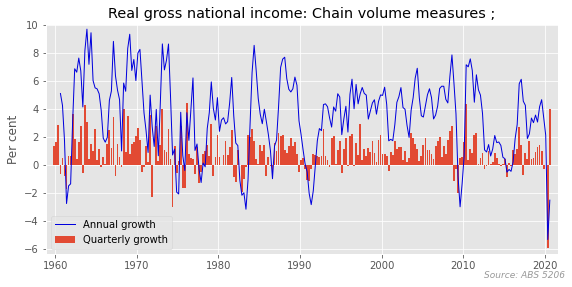

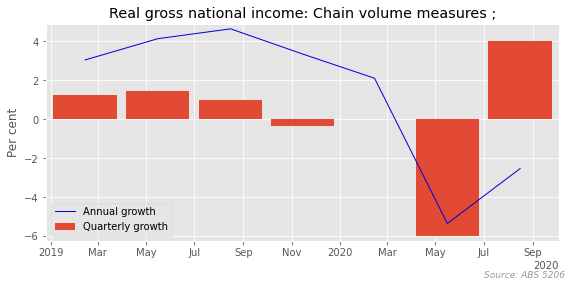

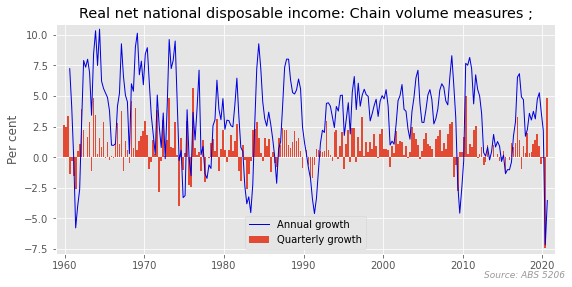

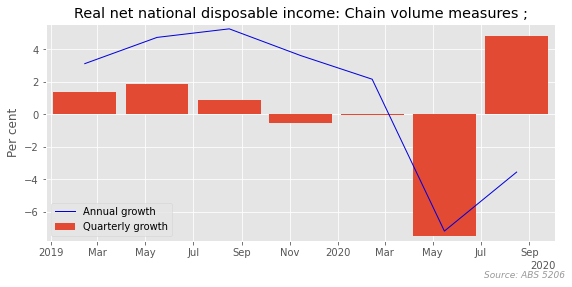

In [7]:
growth_plots = {
    # series: table,
    'Gross domestic product: Chain volume measures ;': '1',
    'GDP per capita: Chain volume measures ;':         '1',
    'Gross value added market sector: Chain volume measures ;': '1',
    'Net domestic product: Chain volume measures ;': '1',
    'Real gross domestic income: Chain volume measures ;': '1',
    'Real gross national income: Chain volume measures ;': '1',
    'Real net national disposable income: Chain volume measures ;': '1',
    'Real net national disposable income: Chain volume measures ;': '1',
}

plot_froms = (None, pd.Timestamp('2019-01-01'))
tags = ('full', 'recent')

for plot, table in growth_plots.items():
    for plot_from, tag in zip(plot_froms, tags):

        series, _ = get_identifier(meta, plot,
                                   "Seasonally Adjusted", 
                                   table)
        
        plot_Qgrowth(data[series], plot, plot_from, 
                     tag, CHART_DIR)
        

## Finished

In [6]:
print('Finished')

Finished
